# **WildFire** **Ananlysis**

As many as 90 percent of wildland fires in the United States are caused by people, according to the U.S. Department of Interior. Some human-caused fires result from campfires left unattended, the burning of debris, downed power lines, negligently discarded cigarettes and intentional acts of arson. The remaining 10 percent are started by lightning or lava.

According to Verisk’s 2019 Wildfire Risk Analysis 4.5 million U.S. homes were identified at high or extreme risk of wildfire, with more than 2 million in California alone. (reference [link text](https://www.iii.org/fact-statistic/facts-statistics-wildfires))

**EDA Thoughts:**


1.   Top Three results of wildfire
2.   Narrowing down to specific states: 
        *   State with highest wildfire damage
        *   Causes for the state
3.   Are we seeing spikes and dips over the years? Why is that?
4.   What main features can we extract and correlate to help in the future
5.   Aside yearly analysis, what months for each year do we have the highest number of fires? What could be the cause? What is the weather around that time of the year?









In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **READ DATA IN**

In [29]:
df=pd.read_csv('gdrive/MyDrive/Big_Data_Princess/Fires_1.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,FPA_ID,FIRE_YEAR,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,COUNTY,FIRE_NAME,DISCOVERY_DATE,FIRE_SIZE,FIRE_SIZE_CLASS,DISCOVERY_TIME,CONT_DATE,CONT_TIME,OWNER_CODE,OWNER_DESCR
0,FS-1418826,2005,9.0,Miscellaneous,40.036944,-121.005833,CA,63,FOUNTAIN,2005-02-02 00:00:00,0.10,A,1300.0,2005-02-02 00:00:00,1730.0,5.0,USFS
1,FS-1418827,2004,1.0,Lightning,38.933056,-120.404444,CA,61,PIGEON,2004-05-12 00:00:00,0.25,A,845.0,2004-05-12 00:00:00,1530.0,5.0,USFS
2,FS-1418835,2004,5.0,Debris Burning,38.984167,-120.735556,CA,17,SLACK,2004-05-31 00:00:00,0.10,A,1921.0,2004-05-31 00:00:00,2024.0,13.0,STATE OR PRIVATE
3,FS-1418845,2004,1.0,Lightning,38.559167,-119.913333,CA,3,DEER,2004-06-28 00:00:00,0.10,A,1600.0,2004-07-03 00:00:00,1400.0,5.0,USFS
4,FS-1418847,2004,1.0,Lightning,38.559167,-119.933056,CA,3,STEVENOT,2004-06-28 00:00:00,0.10,A,1600.0,2004-07-03 00:00:00,1200.0,5.0,USFS


In [ ]:
df.columns

Index(['FPA_ID', 'FIRE_YEAR', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR',
       'LATITUDE', 'LONGITUDE', 'STATE', 'COUNTY', 'FIRE_NAME',
       'DISCOVERY_DATE', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'DISCOVERY_TIME',
       'CONT_DATE', 'CONT_TIME', 'OWNER_CODE', 'OWNER_DESCR'],
      dtype='object')

## **Exploratory** **Analysis**

In [ ]:
# Vizualize to show different relationships of what causes wildfires

In [ ]:
fire_by_state_size = df.groupby('STATE')['FIRE_SIZE'].mean().reset_index()


In [ ]:
fire_by_state_size.head()

,STATE,FIRE_SIZE
0,AK,2509.779198
1,AL,13.828230
2,AR,16.072761
3,AZ,77.901837
4,CA,67.242725


In [ ]:
# get the count of fire cases per state
from collections import Counter 
Counter(df['STATE'].values)

Counter({'AK': 12843,
         'AL': 66570,
         'AR': 31663,
         'AZ': 71586,
         'CA': 189550,
         'CO': 34157,
         'CT': 4976,
         'DC': 66,
         'DE': 171,
         'FL': 90261,
         'GA': 168867,
         'HI': 9895,
         'IA': 4134,
         'ID': 36698,
         'IL': 2327,
         'IN': 2098,
         'KS': 7673,
         'KY': 27089,
         'LA': 30013,
         'MA': 2626,
         'MD': 3622,
         'ME': 13150,
         'MI': 10502,
         'MN': 44769,
         'MO': 17953,
         'MS': 79230,
         'MT': 40767,
         'NC': 111277,
         'ND': 15201,
         'NE': 7973,
         'NH': 2452,
         'NJ': 25949,
         'NM': 37478,
         'NV': 16956,
         'NY': 80870,
         'OH': 3479,
         'OK': 43239,
         'OR': 61088,
         'PA': 8712,
         'PR': 22081,
         'RI': 480,
         'SC': 81315,
         'SD': 30963,
         'TN': 31154,
         'TX': 142021,
         'UT': 30725,
   

In [ ]:
import altair as alt
size_by_year = pd.DataFrame(df.groupby(['FIRE_YEAR']).FIRE_SIZE.sum().sort_values(ascending=False)).reset_index()
size_by_year.rename(columns={'FIRE_SIZE': 'Acres_Affected'}, inplace=True)

alt.Chart(size_by_year).mark_line().encode(
    alt.X('FIRE_YEAR:N', title=None),
    alt.Y('Acres_Affected'),
).properties(
    title=f'Acres_Affected each Year',
    width=600,
    height=300,
).configure_axis(
    labelFontSize=14,
    titleFontSize=14
)

alt.Chart(...)

Notes: Notice the acres affected taken a deep and increased.
- What can we say is the reason for the year 2008, 2010, 2014
- What happened those times  that made us see the deep.


In [30]:
# Get the month the fire occurs. Slice the DISCOVERY_DATE
# Lets see how the fire is per month as against year.
df['DISCOVERY_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'], errors='coerce') #convert to time so we can use it below

# Create a month year column
df['Month_Year'] = df.DISCOVERY_DATE.dt.strftime('%b' ' %Y')
df['Month']= df.DISCOVERY_DATE.dt.strftime('%b')
df['Day_of_Week'] = df['DISCOVERY_DATE'].dt.day_name()

In [ ]:
df.head()

,FPA_ID,FIRE_YEAR,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,COUNTY,FIRE_NAME,DISCOVERY_DATE,FIRE_SIZE,FIRE_SIZE_CLASS,DISCOVERY_TIME,CONT_DATE,CONT_TIME,OWNER_CODE,OWNER_DESCR,Month_Year,Month,Day_of_Week
0,FS-1418826,2005,9.0,Miscellaneous,40.036944,-121.005833,CA,63,FOUNTAIN,2005-02-02,0.10,A,1300.0,2005-02-02 00:00:00,1730.0,5.0,USFS,Feb 2005,Feb,Wednesday
1,FS-1418827,2004,1.0,Lightning,38.933056,-120.404444,CA,61,PIGEON,2004-05-12,0.25,A,845.0,2004-05-12 00:00:00,1530.0,5.0,USFS,May 2004,May,Wednesday
2,FS-1418835,2004,5.0,Debris Burning,38.984167,-120.735556,CA,17,SLACK,2004-05-31,0.10,A,1921.0,2004-05-31 00:00:00,2024.0,13.0,STATE OR PRIVATE,May 2004,May,Monday
3,FS-1418845,2004,1.0,Lightning,38.559167,-119.913333,CA,3,DEER,2004-06-28,0.10,A,1600.0,2004-07-03 00:00:00,1400.0,5.0,USFS,Jun 2004,Jun,Monday
4,FS-1418847,2004,1.0,Lightning,38.559167,-119.933056,CA,3,STEVENOT,2004-06-28,0.10,A,1600.0,2004-07-03 00:00:00,1200.0,5.0,USFS,Jun 2004,Jun,Monday


In [ ]:
# What month do we have the highest fire
# lets group this by month and year for each state
sub_with_Month = df[['Month', 'FIRE_YEAR', 'STATE', 'COUNTY', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'Month_Year']]

In [ ]:
sub_with_Month.head()

,Month,FIRE_YEAR,STATE,COUNTY,FIRE_SIZE,FIRE_SIZE_CLASS,Month_Year
0,Feb,2005,CA,63,0.10,A,Feb 2005
1,May,2004,CA,61,0.25,A,May 2004
2,May,2004,CA,17,0.10,A,May 2004
3,Jun,2004,CA,3,0.10,A,Jun 2004
4,Jun,2004,CA,3,0.10,A,Jun 2004


**Monthly Trends**

 - get count per month for each year
 - get fire size for each month  and year
 - get the month trends for each year across all states.

In [ ]:
# count occurance FIRE_SIZE_CLASS
occur_size = sub_with_Month.groupby(['FIRE_SIZE_CLASS', 'STATE']).size()

In [ ]:
occur_size

FIRE_SIZE_CLASS  STATE
A                AK        6622
                 AL        8625
                 AR         924
                 AZ       42694
                 CA       98309
                          ...  
G                VA           6
                 WA         152
                 WI           1
                 WV           1
                 WY          96
Length: 335, dtype: int64

In [ ]:
# Which County or state has the hughest 
monthly_data = sub_with_Month.groupby(['Month_Year']).size().reset_index(name='Month_Count').sort_values('Month_Year')

In [ ]:
monthly_data.head()

,Month_Year,Month_Count
0,Apr 1992,7810
1,Apr 1993,6926
2,Apr 1994,9561
3,Apr 1995,10089
4,Apr 1996,10035


In [ ]:
import plotly.express as px
month_fig = px.line(monthly_data, x='Month_Year', y='Month_Count')
month_fig.show()

**Day of the Week**


1.  Should we look at what day of the week this occured?
---
2.  Was it around a holiday? Weekend? Weather issues like a storm?



# **DATA** **CLEANING**

In [31]:
clean_df = df.copy()

In [ ]:
clean_df.isnull().sum() # Check for missing values

FPA_ID                   0
FIRE_YEAR                0
STAT_CAUSE_CODE          0
STAT_CAUSE_DESCR         0
LATITUDE                 0
LONGITUDE                0
STATE                    0
COUNTY              678148
FIRE_NAME           960479
DISCOVERY_DATE           0
FIRE_SIZE                0
FIRE_SIZE_CLASS          0
DISCOVERY_TIME      882638
CONT_DATE           891531
CONT_TIME           972553
OWNER_CODE               0
OWNER_DESCR              0
Month_Year               0
Month                    0
Day_of_Week              0
dtype: int64

In [ ]:
clean_df.head()

,FPA_ID,FIRE_YEAR,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,COUNTY,FIRE_NAME,DISCOVERY_DATE,FIRE_SIZE,FIRE_SIZE_CLASS,DISCOVERY_TIME,CONT_DATE,CONT_TIME,OWNER_CODE,OWNER_DESCR
0,FS-1418826,2005,9.0,Miscellaneous,40.036944,-121.005833,CA,63,FOUNTAIN,2005-02-02 00:00:00,0.10,A,1300.0,2005-02-02 00:00:00,1730.0,5.0,USFS
1,FS-1418827,2004,1.0,Lightning,38.933056,-120.404444,CA,61,PIGEON,2004-05-12 00:00:00,0.25,A,845.0,2004-05-12 00:00:00,1530.0,5.0,USFS
2,FS-1418835,2004,5.0,Debris Burning,38.984167,-120.735556,CA,17,SLACK,2004-05-31 00:00:00,0.10,A,1921.0,2004-05-31 00:00:00,2024.0,13.0,STATE OR PRIVATE
3,FS-1418845,2004,1.0,Lightning,38.559167,-119.913333,CA,3,DEER,2004-06-28 00:00:00,0.10,A,1600.0,2004-07-03 00:00:00,1400.0,5.0,USFS
4,FS-1418847,2004,1.0,Lightning,38.559167,-119.933056,CA,3,STEVENOT,2004-06-28 00:00:00,0.10,A,1600.0,2004-07-03 00:00:00,1200.0,5.0,USFS


In [ ]:
# df1 = df[df.isna().any(axis=1)]

# df1

clean_df.dtypes

FPA_ID                      object
FIRE_YEAR                    int64
STAT_CAUSE_CODE            float64
STAT_CAUSE_DESCR            object
LATITUDE                   float64
LONGITUDE                  float64
STATE                       object
COUNTY                      object
FIRE_NAME                   object
DISCOVERY_DATE      datetime64[ns]
FIRE_SIZE                  float64
FIRE_SIZE_CLASS             object
DISCOVERY_TIME             float64
CONT_DATE           datetime64[ns]
CONT_TIME                  float64
OWNER_CODE                 float64
OWNER_DESCR                 object
Month_Year                  object
Month                       object
Day_of_Week                 object
dtype: object

In [ ]:
# make the discovery time and cont date datetime time stamp
# DISCOVERY_TIME: 2005-02-02
# CONT_DATE: 2005-02-02 00:00:00
# CONT_TIME: 1530.0
# COUNTY: 
# FIRE_NAME
clean_df['CONT_DATE'] = clean_df['CONT_DATE'].astype('datetime64')
clean_df['DISCOVERY_DATE'] = clean_df['DISCOVERY_DATE'].astype('datetime64')





In [ ]:
# fill the NAN values
dt_i=[]
dt_fl=[]
dt_o=[]
dt_date=[]
for col in clean_df.columns:
    x=clean_df[col].dtype
    if x=='int64':
        dt_i.append(col)
    elif x=='float64':
        dt_fl.append(col)
    elif x=='datetime64':
      dt_date.append(col)
    else:
        dt_o.append(col)

In [ ]:
clean_df[dt_o] = clean_df[dt_o].fillna(0)
clean_df[dt_o].isna().sum()

FPA_ID              0
STAT_CAUSE_DESCR    0
STATE               0
COUNTY              0
FIRE_NAME           0
DISCOVERY_DATE      0
FIRE_SIZE_CLASS     0
CONT_DATE           0
OWNER_DESCR         0
Month_Year          0
dtype: int64

In [ ]:
# clean_df[dt_date] = clean_df[dt_date].fillna('19800-00-00')
# clean_df[dt_date].isna().sum()


In [ ]:
clean_df[dt_i] = clean_df[dt_i].fillna(value=0)

clean_df[dt_i].isna().sum()

FIRE_YEAR      0
Month          0
Day_of_Week    0
wildfire       0
dtype: int64

In [ ]:
clean_df[dt_fl] = clean_df[dt_fl].fillna(value=0)

clean_df[dt_fl].isna().sum()

STAT_CAUSE_CODE    0
LATITUDE           0
LONGITUDE          0
FIRE_SIZE          0
DISCOVERY_TIME     0
CONT_TIME          0
OWNER_CODE         0
dtype: int64

In [ ]:
clean_df.isnull().sum() # Check for missing values

FPA_ID                   0
FIRE_YEAR                0
STAT_CAUSE_CODE          0
STAT_CAUSE_DESCR         0
LATITUDE                 0
LONGITUDE                0
STATE                    0
COUNTY              678148
FIRE_NAME           960479
DISCOVERY_DATE           0
FIRE_SIZE                0
FIRE_SIZE_CLASS          0
DISCOVERY_TIME      882638
CONT_DATE           891531
CONT_TIME           972553
OWNER_CODE               0
OWNER_DESCR              0
Month_Year               0
Month                    0
Day_of_Week              0
dtype: int64

# **Model Building**

### Correlation

We need to see how the other features correlate to our target variable

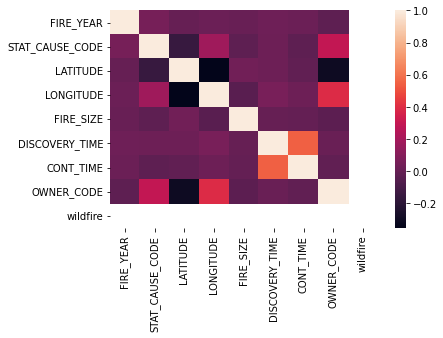

In [ ]:
clean_df['wildfire'] = 1
sns.heatmap(clean_df.corr())

#### Feature Engineering

Here we will be extracting variables that correlate to fire

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesClassifier 

In [33]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [34]:
# xgboost for classification
from numpy import asarray
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectFromModel

In [35]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DTR',DecisionTreeRegressor()))
models.append(('RFC',RandomForestClassifier()))

In [36]:
models_LR = LogisticRegression()
models_KNN = KNeighborsClassifier(n_neighbors=3)
models_DTR = DecisionTreeRegressor()
models_RFC = RandomForestClassifier()
models_ETC = ExtraTreesClassifier()
xgb_model = XGBClassifier()

In [38]:
# Encode the variable for model
clean_df['Day_of_Week']= le.fit_transform(clean_df['Day_of_Week']) 
clean_df['Month']= le.fit_transform(clean_df['Month']) 


In [44]:
# Remove the cause of fire to see if we can predict the causes
train_df_without = clean_df.drop(columns=['STAT_CAUSE_DESCR', 'FPA_ID', 'DISCOVERY_DATE'], axis=1)

In [45]:
# Label encode
#train_df_without['FPA_ID'] = le.fit_transform(train_df_without.FPA_ID.astype(str))
#train_df_without['STAT_CAUSE_DESCR'] = le.fit_transform(train_df_without.STAT_CAUSE_DESCR.astype(str))
train_df_without['STATE'] = le.fit_transform(train_df_without.STATE.astype(str))
train_df_without['FIRE_NAME'] = le.fit_transform(train_df_without.FIRE_NAME.astype(str))
#train_df_without['DISCOVERY_DATE'] = le.fit_transform(train_df_without.DISCOVERY_DATE.astype(str))
train_df_without['FIRE_SIZE_CLASS'] = le.fit_transform(train_df_without.FIRE_SIZE_CLASS.astype(str))
train_df_without['CONT_DATE'] = le.fit_transform(train_df_without.CONT_DATE.astype(str))
train_df_without['OWNER_DESCR'] = le.fit_transform(train_df_without.OWNER_DESCR.astype(str))
train_df_without['Month_Year'] = le.fit_transform(train_df_without.Month_Year.astype(str))
train_df_without['COUNTY'] = le.fit_transform(train_df_without.COUNTY.astype(str))

In [46]:
X = train_df_without
Y = clean_df['STAT_CAUSE_DESCR']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, stratify=Y)

In [42]:
# might need to drop some columns
# train_df_without = train_df_without.drop(columns=['DISCOVERY_DATE',  ], axis=1)
X.columns

Index(['FPA_ID', 'FIRE_YEAR', 'STAT_CAUSE_CODE', 'LATITUDE', 'LONGITUDE',
       'STATE', 'COUNTY', 'FIRE_NAME', 'DISCOVERY_DATE', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'DISCOVERY_TIME', 'CONT_DATE', 'CONT_TIME',
       'OWNER_CODE', 'OWNER_DESCR', 'Month_Year', 'Month', 'Day_of_Week'],
      dtype='object')

**Fit|Transform Model**

In [47]:
xgb_model_mode = xgb_model.fit(X_train, y_train)

In [48]:
print(classification_report(y_test, xgb_model_mode.predict(X_test)))
print(confusion_matrix(y_test, xgb_model_mode.predict(X_test)))

                   precision    recall  f1-score   support

            Arson       1.00      1.00      1.00     70364
         Campfire       1.00      1.00      1.00     19035
         Children       1.00      1.00      1.00     15292
   Debris Burning       1.00      1.00      1.00    107257
    Equipment Use       1.00      1.00      1.00     36903
        Fireworks       1.00      1.00      1.00      2875
        Lightning       1.00      1.00      1.00     69617
    Miscellaneous       1.00      1.00      1.00     80951
Missing/Undefined       1.00      1.00      1.00     41681
        Powerline       1.00      1.00      1.00      3612
         Railroad       1.00      1.00      1.00      8364
          Smoking       1.00      1.00      1.00     13217
        Structure       1.00      1.00      1.00       949

         accuracy                           1.00    470117
        macro avg       1.00      1.00      1.00    470117
     weighted avg       1.00      1.00      1.00    47

In [49]:
print("The xgb_model_mode score is: ", xgb_model_mode.score(X_train, y_train))

The xgb_model_mode score is:  1.0


# **Model Test**

In [ ]:
# Using new data against the model.
# read sqlite data to test

REFERENCES